In [12]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import math
import random
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
sample_info = pd.DataFrame(columns=['P','mu','cov'])
# Class 1
cp_1 = 0.3
# First Gaussian
mean_1  = [1,1,1]
conv_1 = [[0.5, 0,   1  ],
        [0,   2,   0  ],
        [0,   0.5, 0.5]]
d = {'P':cp_1,'mu':mean_1,'cov':conv_1}
d_df = pd.DataFrame([d])
sample_info = pd.concat([sample_info, d_df], ignore_index=True)

In [14]:
# Class 2
cp_2 = 0.3
# Second Guassian
mean_2  = [1,1,2]
conv_2 = [[1,   0,   1  ],
        [0,   1,   0  ],
        [0,   0.5, 1  ]]
d = {'P':cp_2,'mu':mean_2,'cov':conv_2}
d_df = pd.DataFrame([d])
sample_info = pd.concat([sample_info, d_df], ignore_index=True)
# sample_info = sample_info.append(d,ignore_index=True)
# Class 3
cp_3 = 0.4
# Third Gaussian
mean_3a  = [1,2,2]
conv_3a = [[3,   0,   0  ],
        [0,   1,   0  ],
        [0,   0,   0.5]]
d = {'P':(cp_3/2),'mu':mean_3a,'cov':conv_3a}
d_df = pd.DataFrame([d])
###
sample_info = pd.concat([sample_info, d_df], ignore_index=True)
# sample_info = sample_info.append(d,ignore_index=True)
# Fourth Gaussian
mean_3b  = [1,2,1]
conv_3b = [[1,   0,   1  ],
        [0,   1,   0  ],
        [0,   0,   2  ]]
d = {'P':(cp_3/2),'mu':mean_3b,'cov':conv_3b}

d_df = pd.DataFrame([d])
sample_info = pd.concat([sample_info, d_df], ignore_index=True)

In [15]:
loss_matrix=[[0,1,1,1],
             [1,0,1,1],
             [1,1,0,1],
             [1,1,1,0]]
loss_data_matrix_10 = [[0,   1,   10  , 10],
                    [1,   0,   10  , 10],
                    [1,   1,   0   , 0 ],
                    [1,   1,   0   , 0 ]]
loss_data_matrix_100 = [[0,   1,  100  , 100],
                    [1,   0,  100  , 100],
                    [1,   1,  0    , 0  ],
                    [1,   1,  0    , 0  ]]

In [16]:
rng = default_rng()
overall_size = 10000
size_1 = 0
size_2 = 0
size_3a = 0
size_3b = 0
for i in range(0, overall_size) :
    r = random.random()
    if(r < cp_1):
        size_1 = size_1 + 1
    elif(r < cp_1+cp_2):
        size_2 = size_2 + 1
    elif(r < cp_1+cp_2+(cp_3/2)):
        size_3a = size_3a + 1
    else:
        size_3b = size_3b + 1
samples_1 = rng.multivariate_normal(mean=mean_1, cov=conv_1, size=size_1)
samples_1 = pd.DataFrame(samples_1, columns=['x','y','z'])
samples_1['True Class Label'] = 1
samples_2 = rng.multivariate_normal(mean=mean_2, cov=conv_2, size=size_2)
samples_2 = pd.DataFrame(samples_2, columns=['x','y','z'])
samples_2['True Class Label'] = 2
samples_3a = rng.multivariate_normal(mean=mean_3a, cov=conv_3a, size=size_3a)
samples_3a = pd.DataFrame(samples_3a, columns=['x','y','z'])
samples_3a['True Class Label'] = 3
samples_3b = rng.multivariate_normal(mean=mean_3b, cov=conv_3b, size=size_3b)
samples_3b = pd.DataFrame(samples_3a, columns=['x','y','z'])
samples_3b['True Class Label'] = 3
samples = pd.concat([samples_1, samples_2, samples_3a, samples_3b], ignore_index=True)
samples.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_a.csv')


C:\Users\anifa\AppData\Local\Temp\ipykernel_18936\1576769673.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples_1 = rng.multivariate_normal(mean=mean_1, cov=conv_1, size=size_1)
C:\Users\anifa\AppData\Local\Temp\ipykernel_18936\1576769673.py:20: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples_2 = rng.multivariate_normal(mean=mean_2, cov=conv_2, size=size_2)
C:\Users\anifa\AppData\Local\Temp\ipykernel_18936\1576769673.py:26: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples_3b = rng.multivariate_normal(mean=mean_3b, cov=conv_3b, size=size_3b)


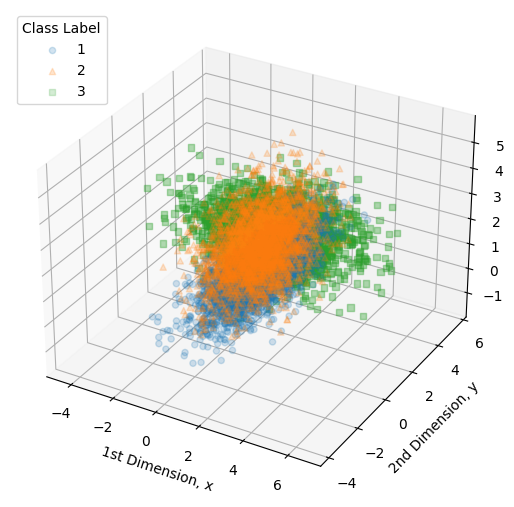

In [17]:
samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_a.csv',index_col=0)
fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
samples_1 = samples[samples['True Class Label']==1]
samples_2 = samples[samples['True Class Label']==2]
samples_3 = samples[samples['True Class Label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2)
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2)
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2)
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
ax.legend(loc='upper left', title='Class Label')
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\Samples_data_scatterplot_a.png')


In [18]:
def risk(i , x , loss_matrix, sample_info):
    risk = 0
    for j, row in sample_info.iterrows():
        #  Probability, mu, sigma^2
        #print(j)
        if(i==j):
            continue
        #print(loss_matrix[i][j])
        # pdf_value = multivariate_normal.pdf(x, row['mu'], row['cov'])
        # print(multivariate_normal.pdf(x,row['mu'],row['cov']))
        risk = risk + loss_matrix[i][j]*row['P']*multivariate_normal.pdf(x,row['mu'],row['cov'])
        # print(risk)
    return risk

In [19]:
samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_a.csv',index_col=0)
choices  = []
correct = []

for idx, row in samples.iterrows():
    # Modify class label for computation
    distribution = int(row['True Class Label'])
    choice = np.argmin([risk(0,[row['x'],row['y'],row['z']],loss_matrix,sample_info), risk(1,[row['x'],row['y'],row['z']],loss_matrix,sample_info), 
                            risk(2,[row['x'],row['y'],row['z']],loss_matrix,sample_info), risk(3,[row['x'],row['y'],row['z']],loss_matrix,sample_info)])
    # Make sure 3a and 3b are together
    if(choice==0):
        choices.append(1) 
        choice = 1
    elif(choice==1):
        choices.append(2)
        choice = 2
    else:
        choices.append(3)
        choice = 3
    # Check if classification was correct or not
    if(choice==distribution):
        correct.append(True)
    else:
        correct.append(False)
samples['ERM Classification'] = choices
samples['Correct']            = correct
samples.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_a.csv')

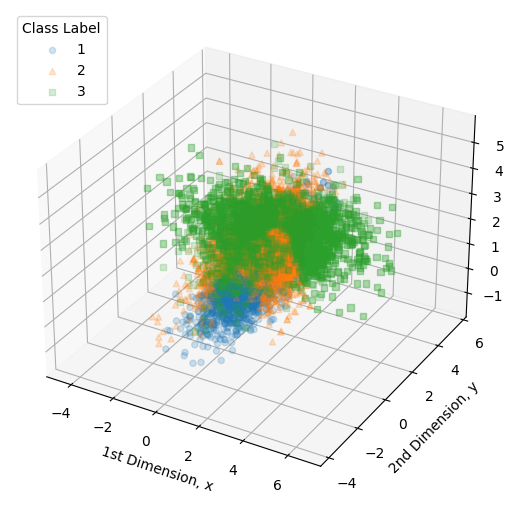

In [20]:
samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_a.csv',index_col=0)
fig = plt.figure(figsize = (5, 5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
samples_1 = samples[samples['ERM Classification']==1]
samples_2 = samples[samples['ERM Classification']==2]
samples_3 = samples[samples['ERM Classification']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2)
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2)
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2)
#ax.set_title("Samples from Multivariate Gaussian Distributions")
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
ax.legend(loc='upper left', title='Class Label')
save_path=r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_classified_scatterplot.png'
plt.savefig(save_path)


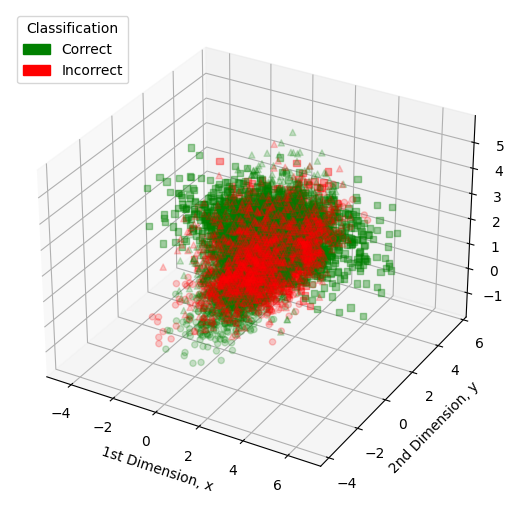

In [21]:
samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_a.csv',index_col=0)
fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(left=0.01, right=0.985, top=0.99, bottom=0.01, wspace=0)
ax = plt.axes(projection ="3d")
# Plot correct
correct = samples[samples['Correct']==True]
samples_1 = correct[correct['True Class Label']==1]
samples_2 = correct[correct['True Class Label']==2]
samples_3 = correct[correct['True Class Label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='green')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='green')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='green')
# Plot incorrect
correct = samples[samples['Correct']==False]
samples_1 = correct[correct['True Class Label']==1]
samples_2 = correct[correct['True Class Label']==2]
samples_3 = correct[correct['True Class Label']==3]
x_1 = samples_1['x'].tolist()
y_1 = samples_1['y'].tolist()
z_1 = samples_1['z'].tolist()
x_2 = samples_2['x'].tolist()
y_2 = samples_2['y'].tolist()
z_2 = samples_2['z'].tolist()
x_3 = samples_3['x'].tolist()
y_3 = samples_3['y'].tolist()
z_3 = samples_3['z'].tolist()
ax.scatter3D(x_1, y_1, z_1, label='1', marker='o', alpha=0.2, color='red')
ax.scatter3D(x_2, y_2, z_2, label='2', marker='^', alpha=0.2, color='red')
ax.scatter3D(x_3, y_3, z_3, label='3', marker='s', alpha=0.2, color='red')
ax.set_xlabel('1st Dimension, x')
ax.set_ylabel('2nd Dimension, y')
ax.set_zlabel('3rd Dimension, z')
#ax.get_legend().remove()
green_patch = mpatches.Patch(color='green', label='Correct')
red_patch = mpatches.Patch(color='red', label='Incorrect')
ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_classified_corrected_scatterplot.png')

[[0.65643763 0.17478319 0.16877919]
 [0.23109656 0.6304419  0.13846154]
 [0.18159327 0.31716972 0.50123701]]


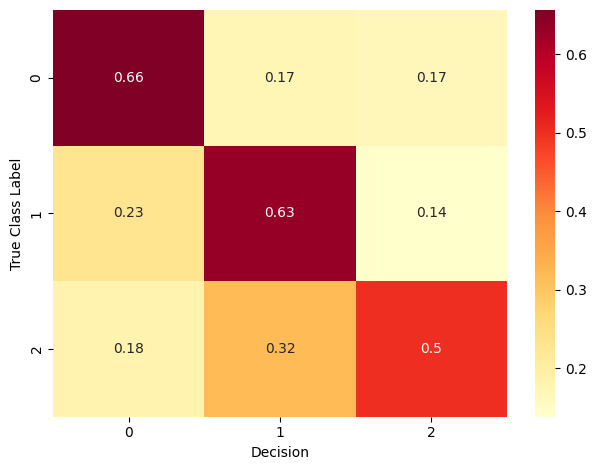

In [22]:
samples = pd.read_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\samples_a.csv')
pred = samples['ERM Classification'].tolist()
act  = samples['True Class Label'].tolist()
confusion = confusion_matrix(act, pred, normalize='true')
print(confusion)
sns.heatmap(data=confusion,cmap="YlOrRd",annot=True,)
plt.xlabel('Decision')
plt.ylabel('True Class Label')
plt.tight_layout()
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_1\Problem_2\PART_A\decision_matrix.png')